# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised learning algorithm widely used for classification and regression tasks. It's known for its ability to handle high-dimensional data and perform both linear and non-linear classification.

## Characteristics

- **Margin Maximization:** Focuses on maximizing the distance between the different classes.
- **Support Vectors:** Key data points that help in defining the hyperplane.
- **Kernel Trick:** Allows efficient computation in high-dimensional space for non-linear classification.
- **Regularization:** Balances training error and generalization.

## Applications

- Used extensively in image and text classification, bioinformatics, and other areas where high-dimensional data is common.

## Limitations

- Less effective on larger datasets and sensitive to noise and mislabeling.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
file_path = '~/Downloads/Wine.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Assuming the first column is the target variable
X = data.iloc[:, 1:]  # Features
y = data.iloc[:, 0]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels such as 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[14  0  0]
 [ 0 10  4]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.71      0.83        14
           3       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.89        36



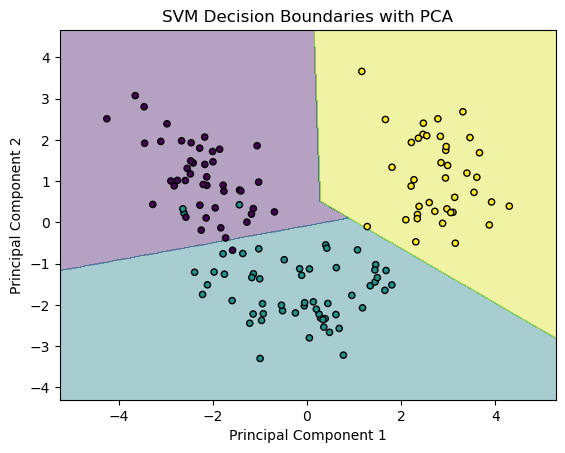

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Assuming X_train, y_train are already defined and svm_model is trained

# Reduce dimensions with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_r = pca.fit_transform(X_train)

# Train SVM on the transformed data
svm_model_pca = SVC(kernel='linear')
svm_model_pca.fit(X_r, y_train)

# Plotting decision regions
x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_model_pca.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('SVM Decision Boundaries with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
